# EDA on Housing dataset


In [1]:
cd drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Reading train and test data

In [3]:
train_set = pd.read_csv('train (2).csv')
test_set = pd.read_csv('test (2).csv')

In [4]:
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

### Reading given column descriptions

In [5]:
cat data_description.txt 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Getting map of columns with number of NAN values

In [6]:
d = train_set.isnull().sum()
[(d.index[x],d.values[x]) for x in range(len(d))  if d.values[x]!=0]

[('LotFrontage', 259),
 ('Alley', 1369),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinType2', 38),
 ('Electrical', 1),
 ('FireplaceQu', 690),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('PoolQC', 1453),
 ('Fence', 1179),
 ('MiscFeature', 1406)]

### Getting map of columns with number of unique values

In [7]:
cols = train_set.apply(lambda col: len(col.unique()))
cols_map = {cols.index[x]:cols.values[x] for x in range(len(cols))}
cols_map

{'1stFlrSF': 753,
 '2ndFlrSF': 417,
 '3SsnPorch': 20,
 'Alley': 3,
 'BedroomAbvGr': 8,
 'BldgType': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinSF1': 637,
 'BsmtFinSF2': 144,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'BsmtQual': 5,
 'BsmtUnfSF': 780,
 'CentralAir': 2,
 'Condition1': 9,
 'Condition2': 8,
 'Electrical': 6,
 'EnclosedPorch': 120,
 'ExterCond': 5,
 'ExterQual': 4,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Fence': 5,
 'FireplaceQu': 6,
 'Fireplaces': 4,
 'Foundation': 6,
 'FullBath': 4,
 'Functional': 7,
 'GarageArea': 441,
 'GarageCars': 5,
 'GarageCond': 6,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageType': 7,
 'GarageYrBlt': 98,
 'GrLivArea': 861,
 'HalfBath': 3,
 'Heating': 6,
 'HeatingQC': 5,
 'HouseStyle': 8,
 'Id': 1460,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'LandContour': 4,
 'LandSlope': 3,
 'LotArea': 1073,
 'LotConfig': 5,
 'LotFrontage': 111,
 'LotShape': 4,
 'LowQualFinSF': 24,
 'MSSubClass': 15,
 'MSZoning': 5,
 '

### Descriptive statistics on train_set


In [8]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### All the columns with Nan values indicate that the specific attribute represented by the column isn't actually present in the house.
#### For example:- As in GarageCars and GarageArea	have values ) in ndexes where GarageQual and GarageCond have Nan values . Thus we fill them with 0 to treat them as another category after Label Encoding

### Filling Nan values with 0

In [9]:
train_set = train_set.fillna(0)
test_set = test_set.fillna(0)

In [10]:
train= train_set.drop(columns = ['Id'], axis = 1)
test = test_set.drop(columns = ['Id'], axis = 1)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0

### Getting columns data type which are in turn categorical columns

In [11]:
dt = train.dtypes
cat_cols = [dt.index[x] for x in range(len(dt)) if dt.values[x]=='object']
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Label Encoding Categorical columns

In [12]:
from sklearn.preprocessing import LabelEncoder

for ft in cat_cols:
    
    le = LabelEncoder()
    uniq = set(list(train[ft].unique())) | set(list(test[ft].unique()))
    le.fit(list(uniq)) 
    
    # print(uniq,ft)

    train[ft] = le.transform(train[ft].astype(str))
    test[ft] = le.transform(test[ft].astype(str))


# Feature Selection based on correlation

### Getting correlation values of each column with one another

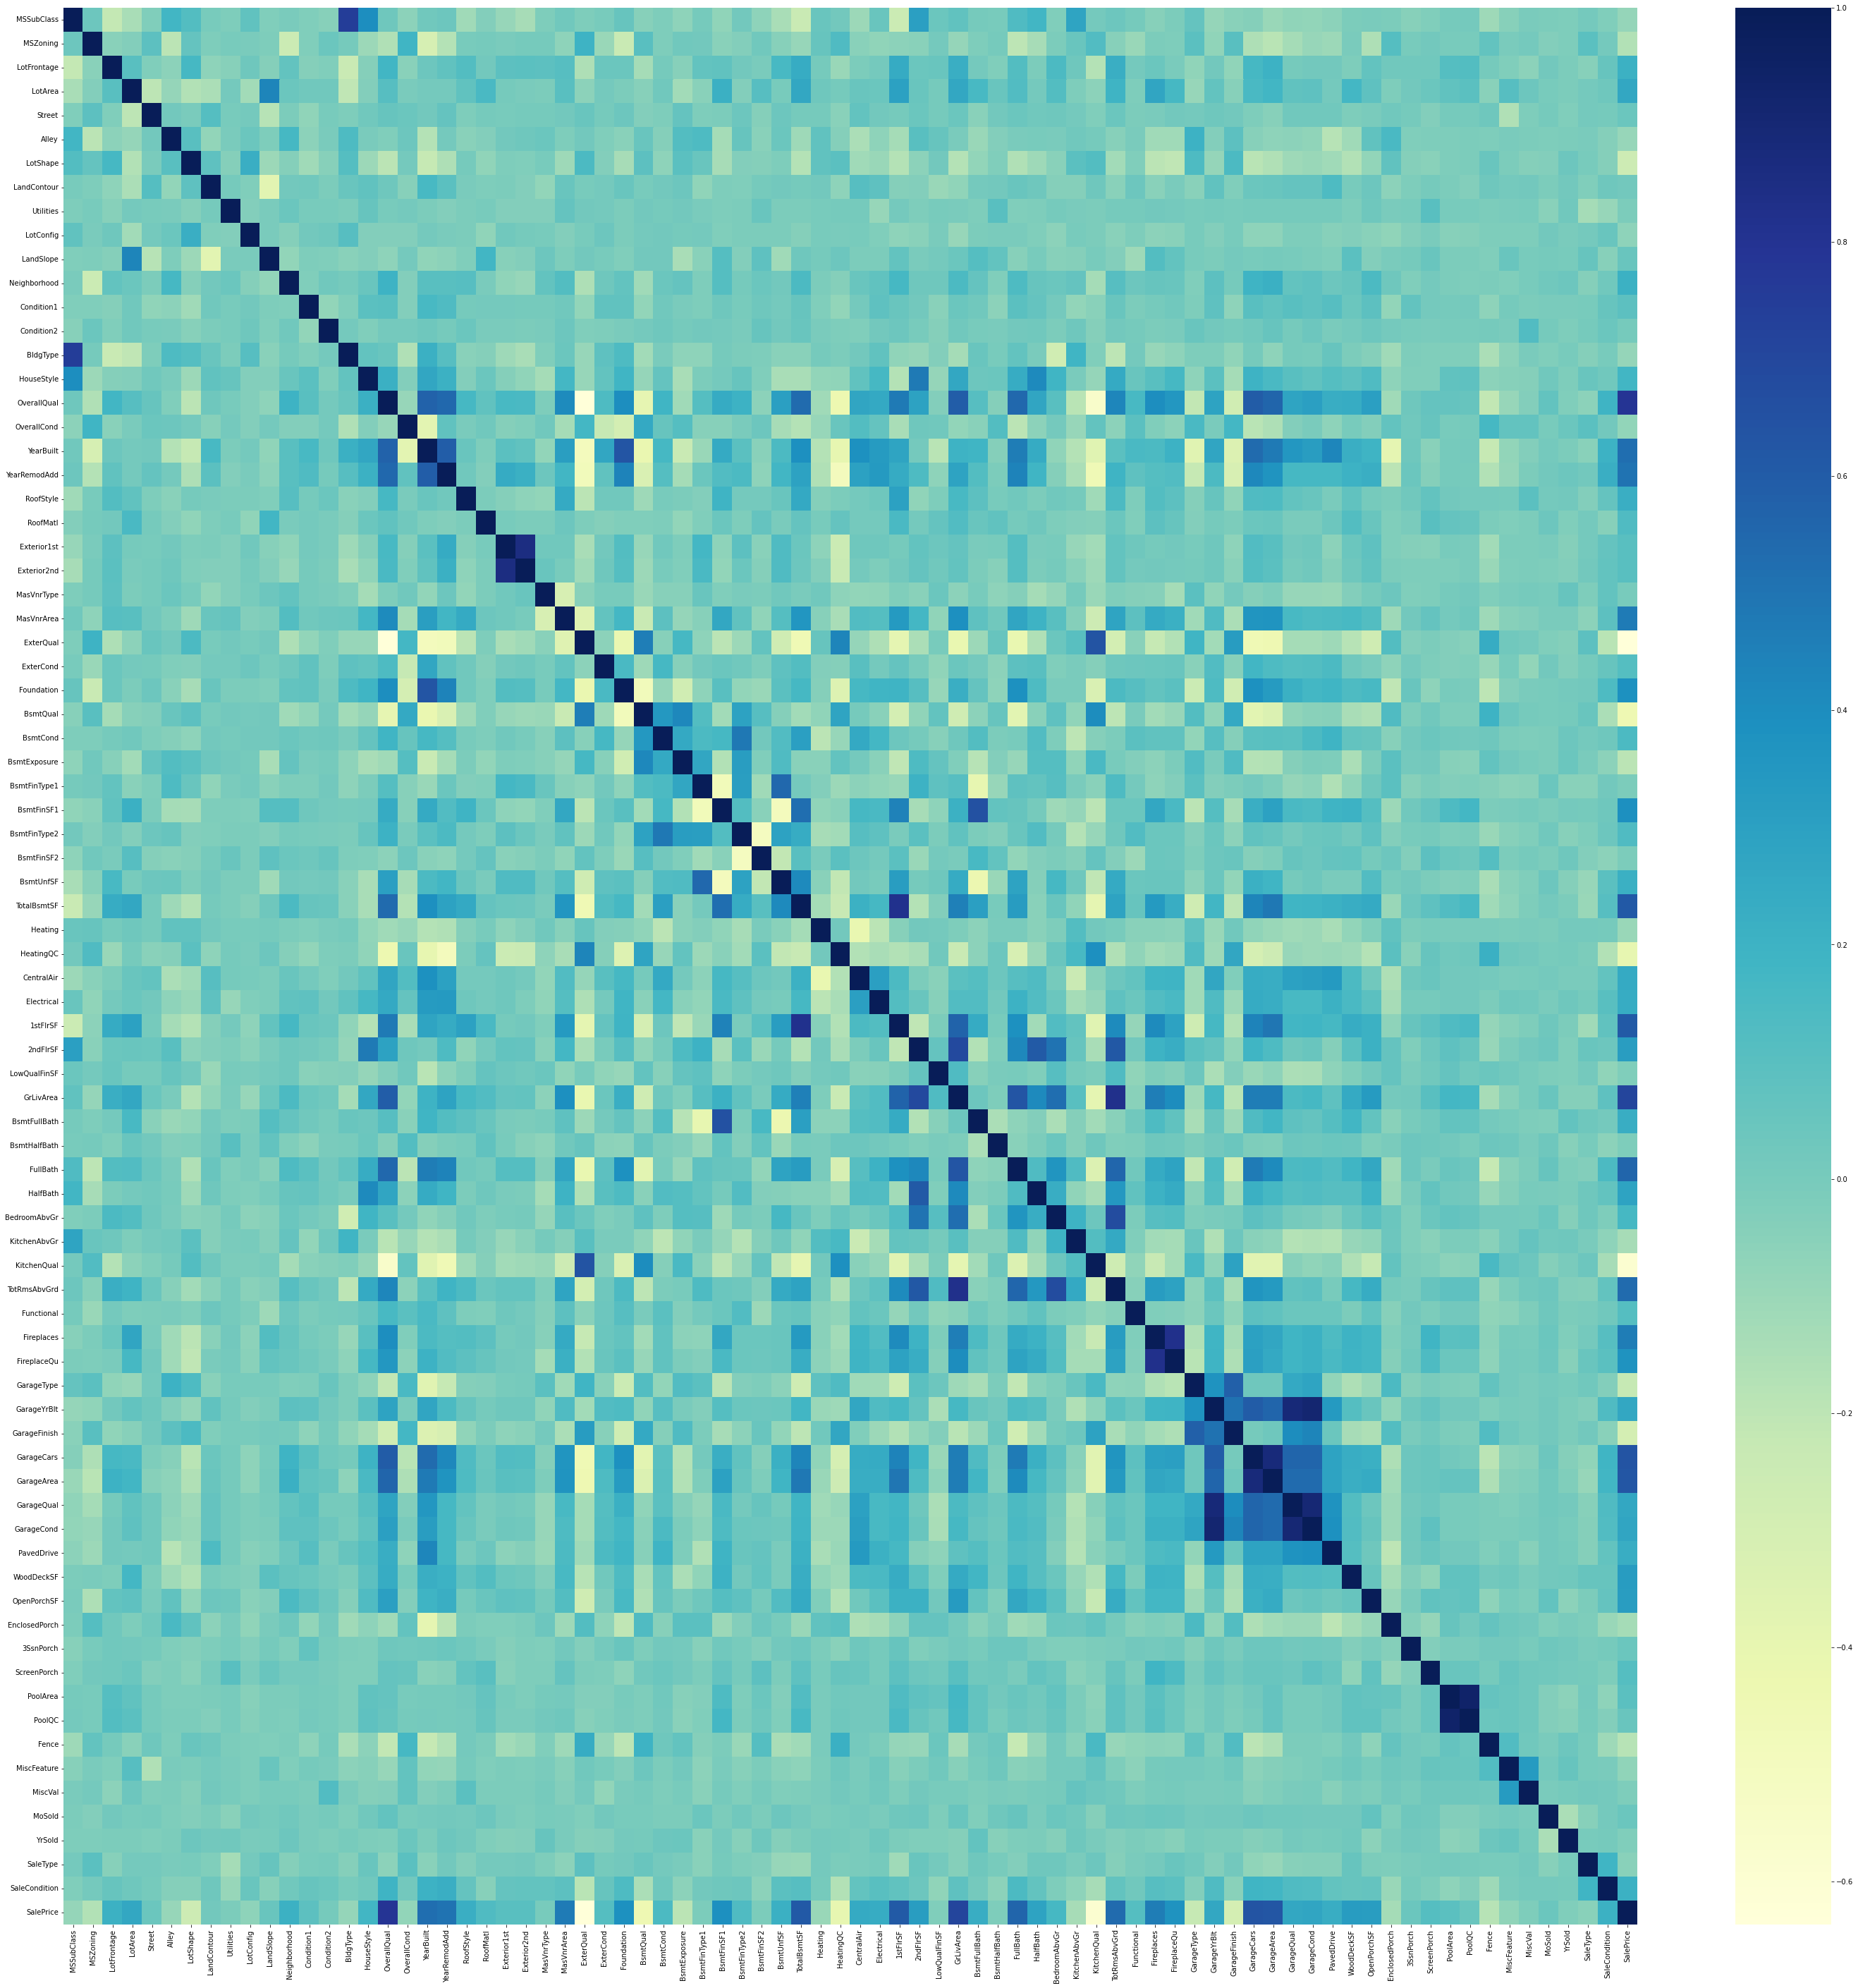

In [13]:
plt.figure(figsize = (50,50))
dataplot = sb.heatmap(train.corr(), cmap="YlGnBu")

###Getting correlation values of each column with SalePrice

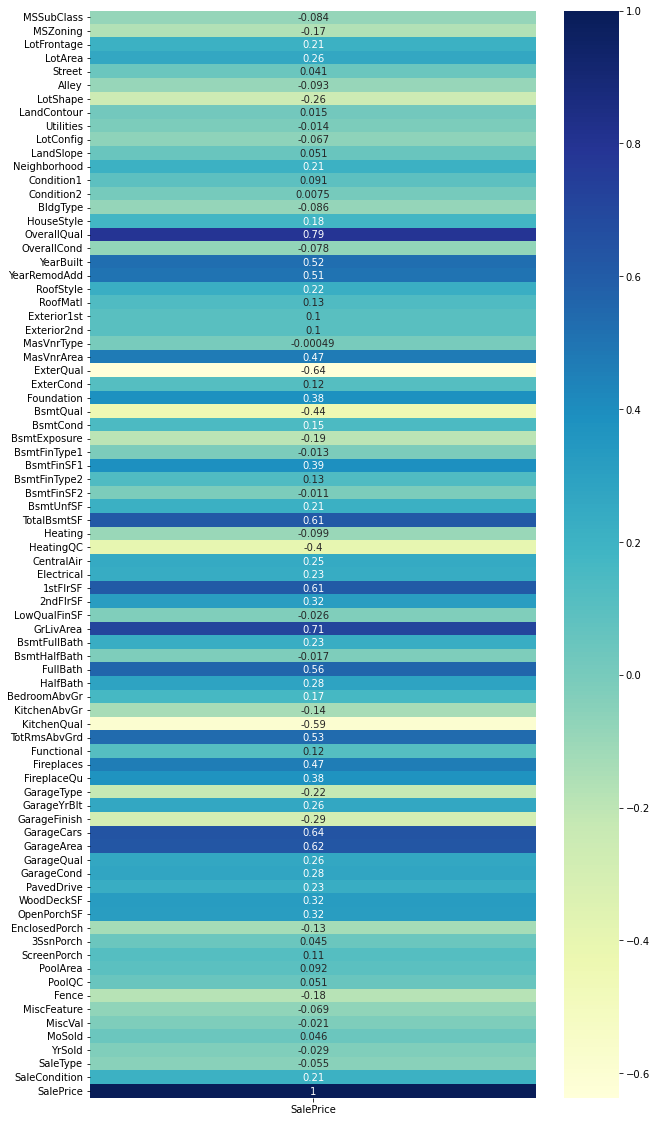

In [14]:
plt.figure(figsize = (10,20))
dataplot = sb.heatmap(train.corr()[['SalePrice']], cmap="YlGnBu",annot = True)

### Selecting columns with correlation values greater than 0.2

In [15]:
corr = train.corr()[['SalePrice']]
best_corr  = [corr.index[x] for x in range(len(corr)) if abs(corr.values[x])>=0.2]
best_corr

['LotFrontage',
 'LotArea',
 'LotShape',
 'Neighborhood',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'SaleCondition',
 'SalePrice']

### Correlation map between best correlated columns with SalePrice

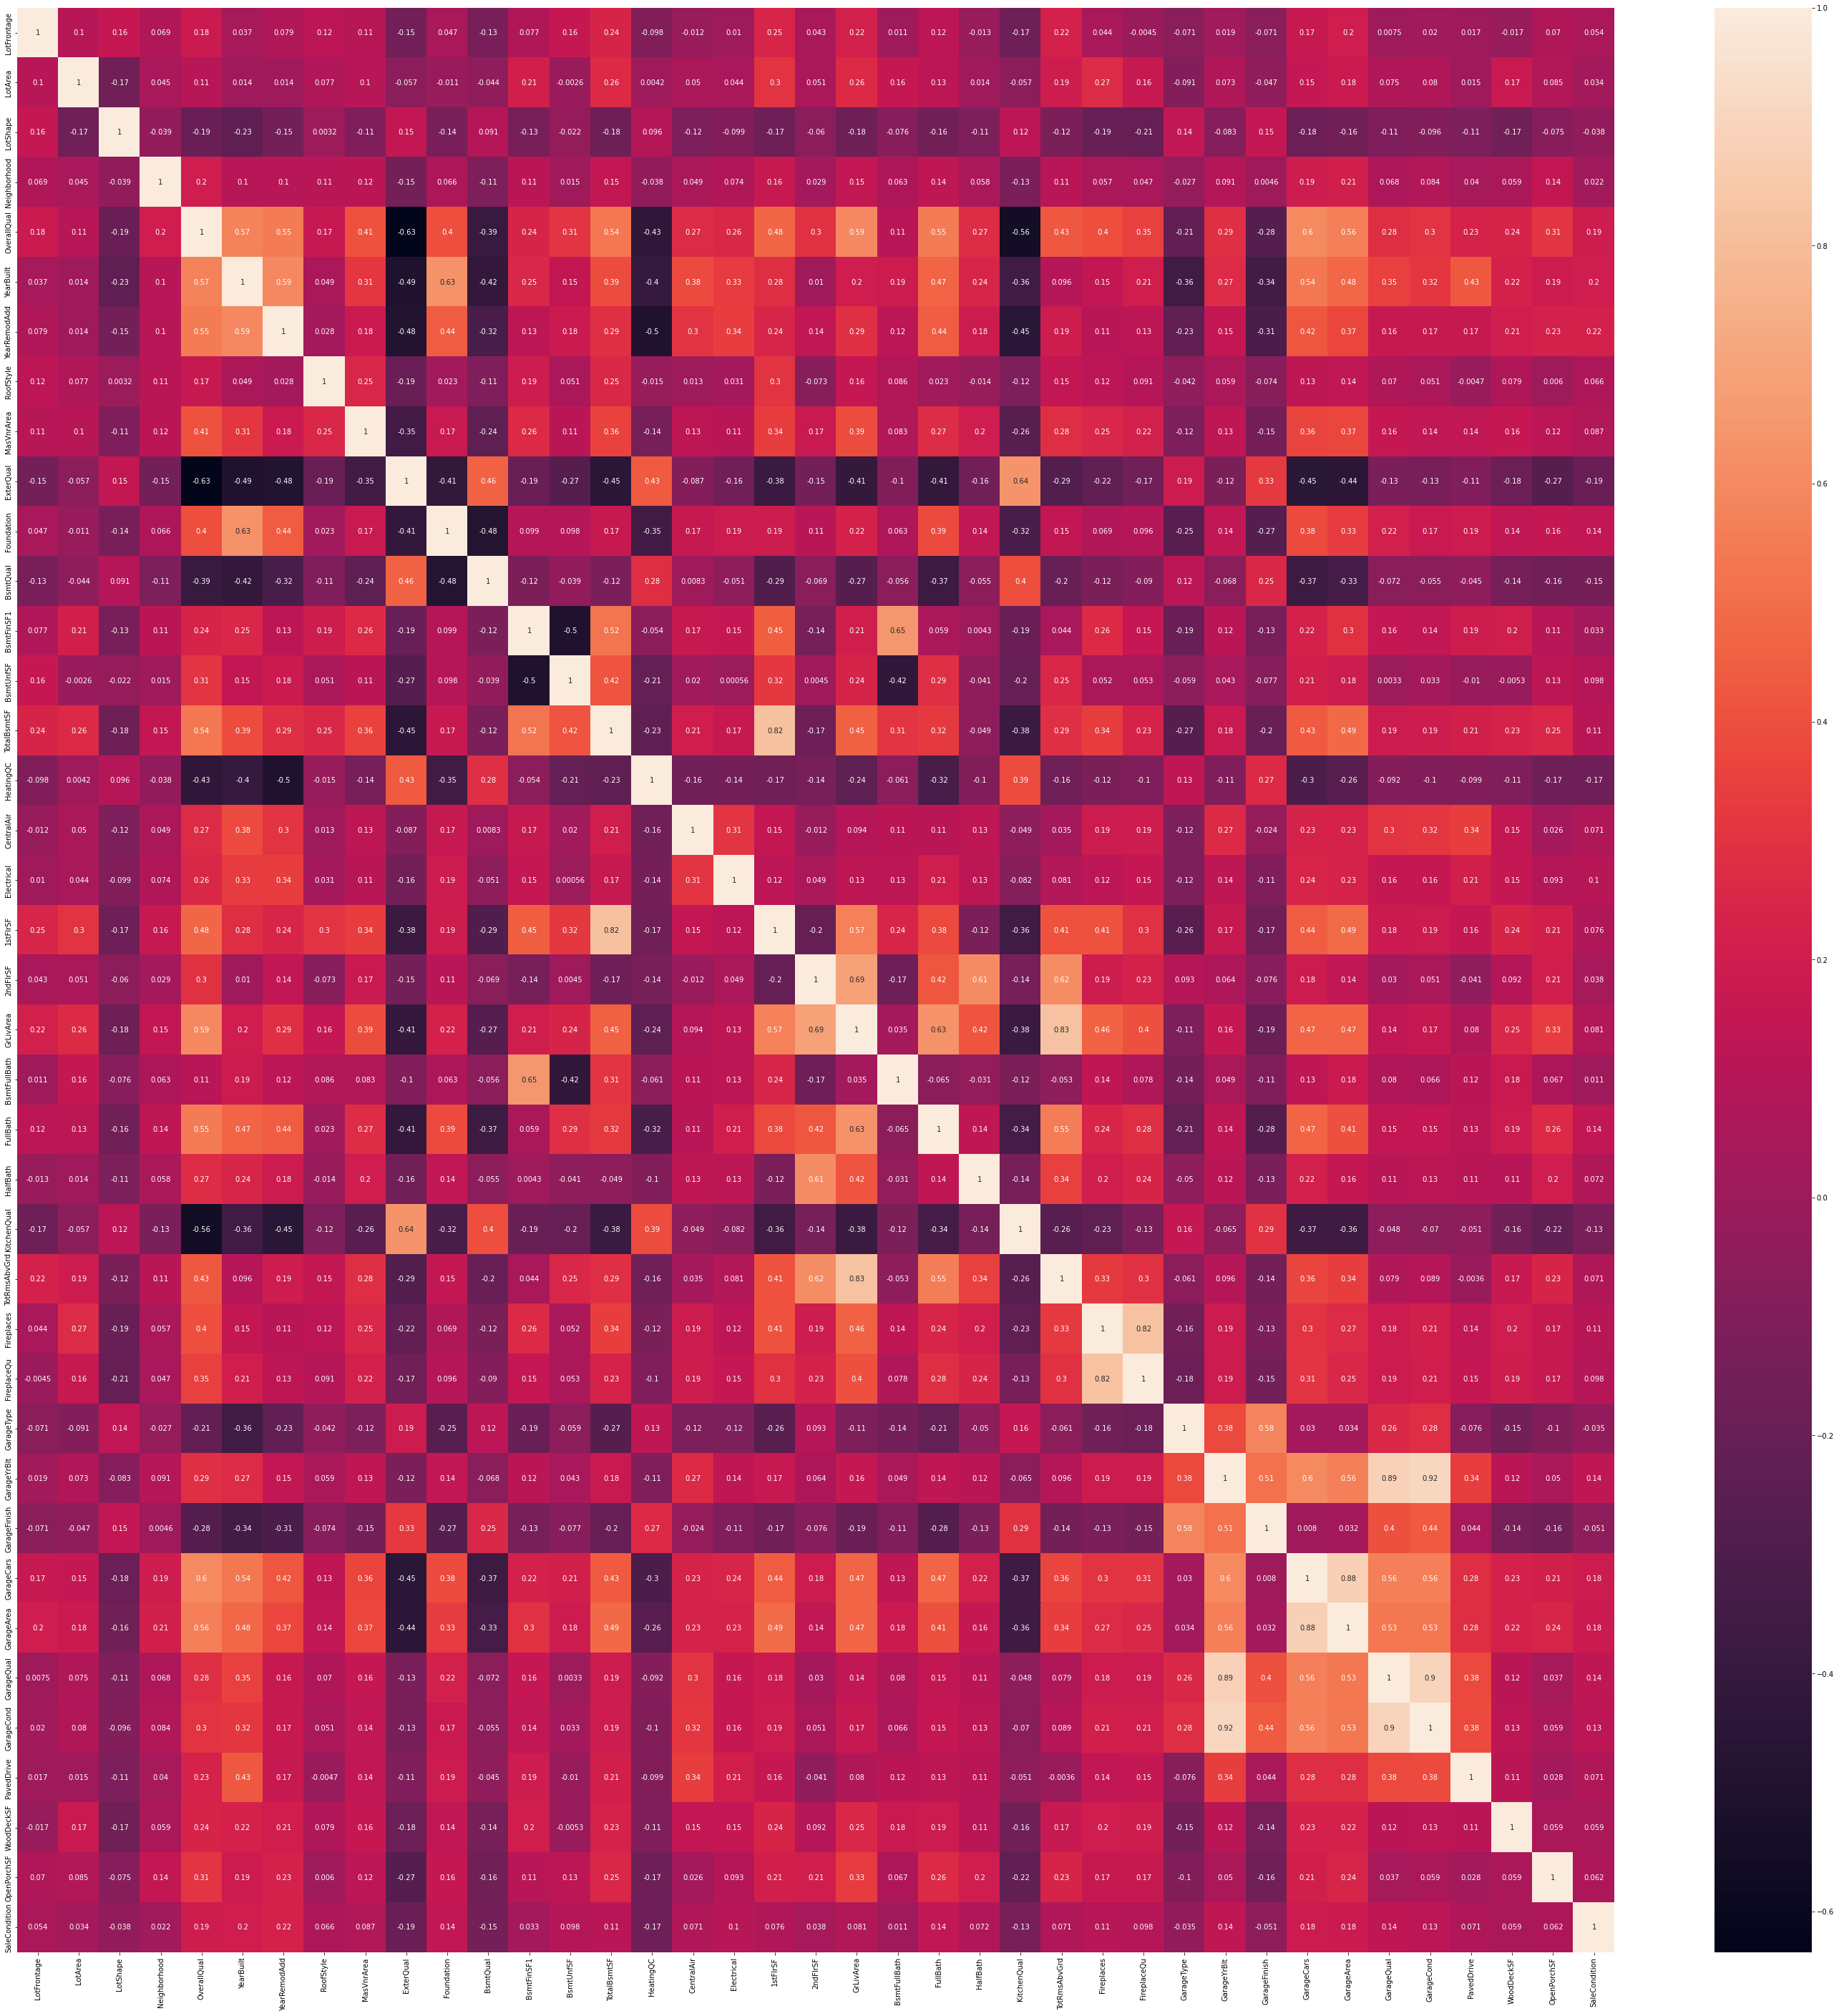

In [16]:
plt.figure(figsize = (50,50))
df_train = train[best_corr[:-1]]
df_test = test[best_corr[:-1]]
dataplot = sb.heatmap(df_train.corr(), annot=True)

### Selection colum pairs with high inter-correlation

In [17]:
btwn = df_train.corr()
inter_corr = set()
for i in best_corr[:-1]:
    for j in best_corr[:-1]:
        if i!=j and btwn.loc[[i],[j]].values >=0.5:
            # print("Columns:- {} , {} and \n corr_value:- {}\n".format(i,j,btwn.loc[[i],[j]].values))
            if (j,i) not in inter_corr:
                inter_corr.add((i,j))
inter_corr

{('1stFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('2ndFlrSF', 'TotRmsAbvGrd'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('BsmtFinSF1', 'TotalBsmtSF'),
 ('ExterQual', 'KitchenQual'),
 ('Fireplaces', 'FireplaceQu'),
 ('FullBath', 'TotRmsAbvGrd'),
 ('GarageArea', 'GarageCond'),
 ('GarageArea', 'GarageQual'),
 ('GarageCars', 'GarageArea'),
 ('GarageCars', 'GarageCond'),
 ('GarageCars', 'GarageQual'),
 ('GarageQual', 'GarageCond'),
 ('GarageType', 'GarageFinish'),
 ('GarageYrBlt', 'GarageArea'),
 ('GarageYrBlt', 'GarageCars'),
 ('GarageYrBlt', 'GarageCond'),
 ('GarageYrBlt', 'GarageFinish'),
 ('GarageYrBlt', 'GarageQual'),
 ('GrLivArea', 'FullBath'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('OverallQual', 'FullBath'),
 ('OverallQual', 'GarageArea'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('YearBuilt', 'Foundation'),
 ('

### Selecting columns by picking best columns among inter-correlated columns 

In [18]:
dropped_cols = ['YearBuilt','YearRemodAdd','2ndFlrSF','BsmtFullBath','FireplaceQu', 
                'GarageCars','GarageCond','GarageFinish','GarageQual','GarageType',
                'GarageYrBlt','HalfBath','KitchenQual','OverallQual','BsmtFinSF1']
X_train = df_train.drop(columns = dropped_cols)
y_train = train['SalePrice']
X_test = df_test.drop(columns = dropped_cols)

In [19]:
num = X_train.nunique()
numerical_cols = [num.index[x] for x in range(len(num)) if num.values[x]>100]
numerical_cols.append('TotRmsAbvGrd')
numerical_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'TotRmsAbvGrd']

### Standardizing numerical columns

In [20]:
from sklearn.preprocessing import StandardScaler

col_names = numerical_cols

train_features = X_train[col_names]
test_features = X_test[col_names]

scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)

scaler = StandardScaler().fit(test_features.values)
test_features = scaler.transform(test_features.values)

X_train[col_names] = train_features
X_test[col_names] = test_features


In [22]:
from sklearn.model_selection import train_test_split

X_tra, X_validation, y_tra, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_tra, y_tra)
reg.score(X_validation, y_validation)

0.8156793891388916

## Feature selection based on f-regression statistics

### Selecting best features using sklearn SelectKBest function and f_regression statistics

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [29]:
X_train = train.drop(columns='SalePrice')
y_train = train['SalePrice']
X_test = test
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


### Plotting f_regression statistic scores

Feature 0, MSSubClass: 	10.43146611279936
Feature 1, MSZoning: 	41.7628955379245
Feature 2, LotFrontage: 	67.01239705983915
Feature 3, LotArea: 	109.09035512347637
Feature 4, Street: 	2.4592895583693006
Feature 5, Alley: 	12.612175595662793
Feature 6, LotShape: 	101.89394166528675
Feature 7, LandContour: 	0.34825746909533595
Feature 8, Utilities: 	0.29880407484883564
Feature 9, LotConfig: 	6.652780921929353
Feature 10, LandSlope: 	3.8249416967156695
Feature 11, Neighborhood: 	67.83614300567596
Feature 12, Condition1: 	12.21634799272406
Feature 13, Condition2: 	0.08229587467328228
Feature 14, BldgType: 	10.759770130859074
Feature 15, HouseStyle: 	48.91221695918514
Feature 16, OverallQual: 	2436.770590906353
Feature 17, OverallCond: 	8.89162259532116
Feature 18, YearBuilt: 	548.6658210637398
Feature 19, YearRemodAdd: 	504.71485472492975
Feature 20, RoofStyle: 	75.87159981367662
Feature 21, RoofMatl: 	26.00766215380409
Feature 22, Exterior1st: 	15.803315759990607
Feature 23, Exterior2nd: 

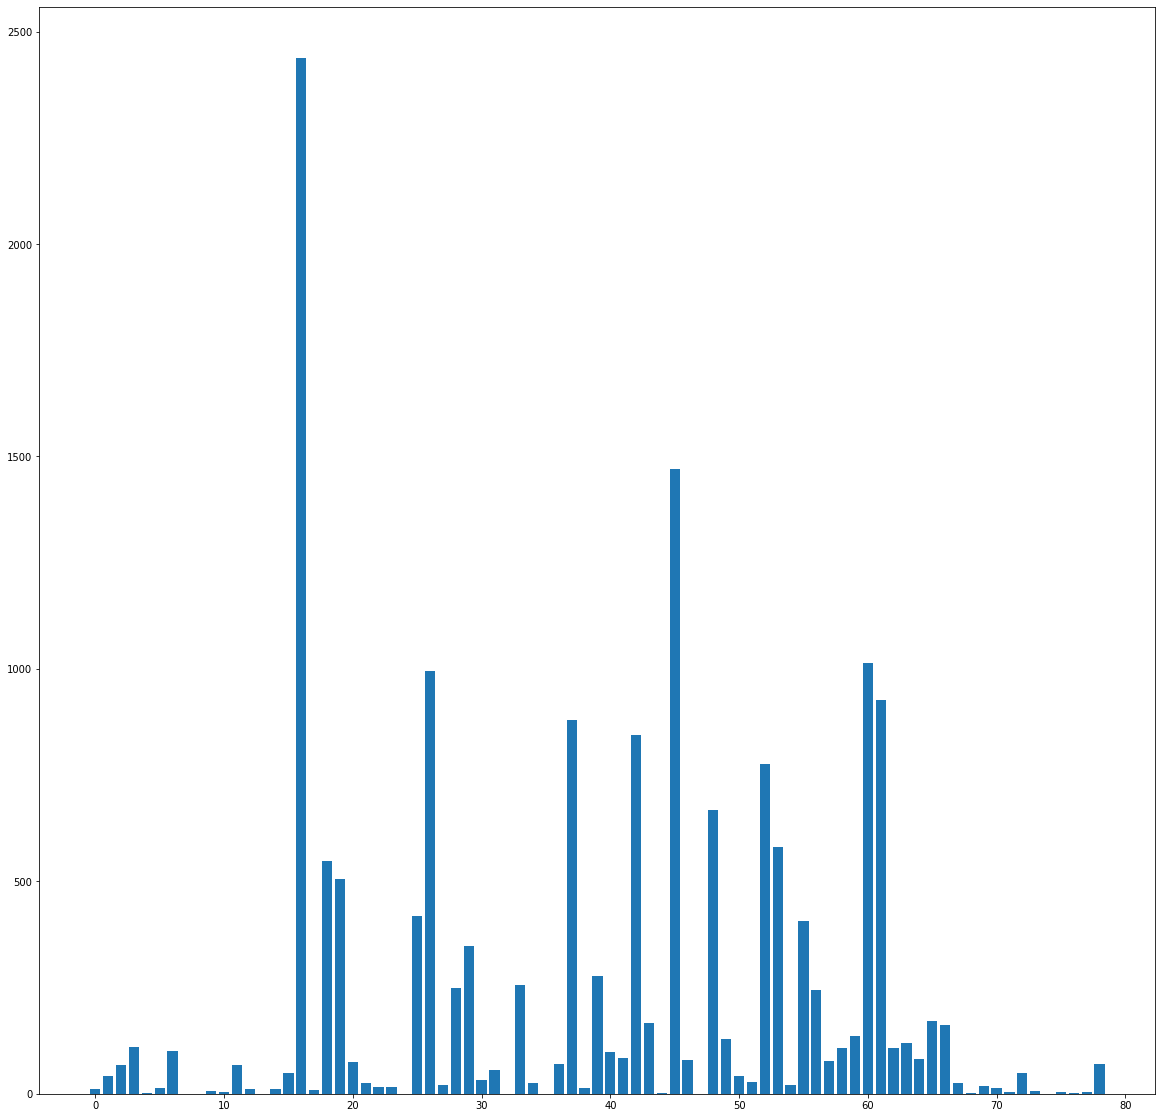

In [30]:
plt.figure(figsize = (20,20))

for i in range(len(fs.scores_)):
	print('Feature {}, {}: \t{}'.format(i,train.columns[i], fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X_train_f, X_validation_f, y_train_f, y_validation_f = train_test_split(X_train_fs, y_train, test_size=0.2, random_state=123)

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_f, y_train_f)
reg.score(X_validation_f, y_validation_f)

0.8695292478498555

# Feature Selection using Lasso regression

### Using Lasso regression analysis to get relevant columns

Text(0.5, 1.0, 'Coefficients from Elastic Net')

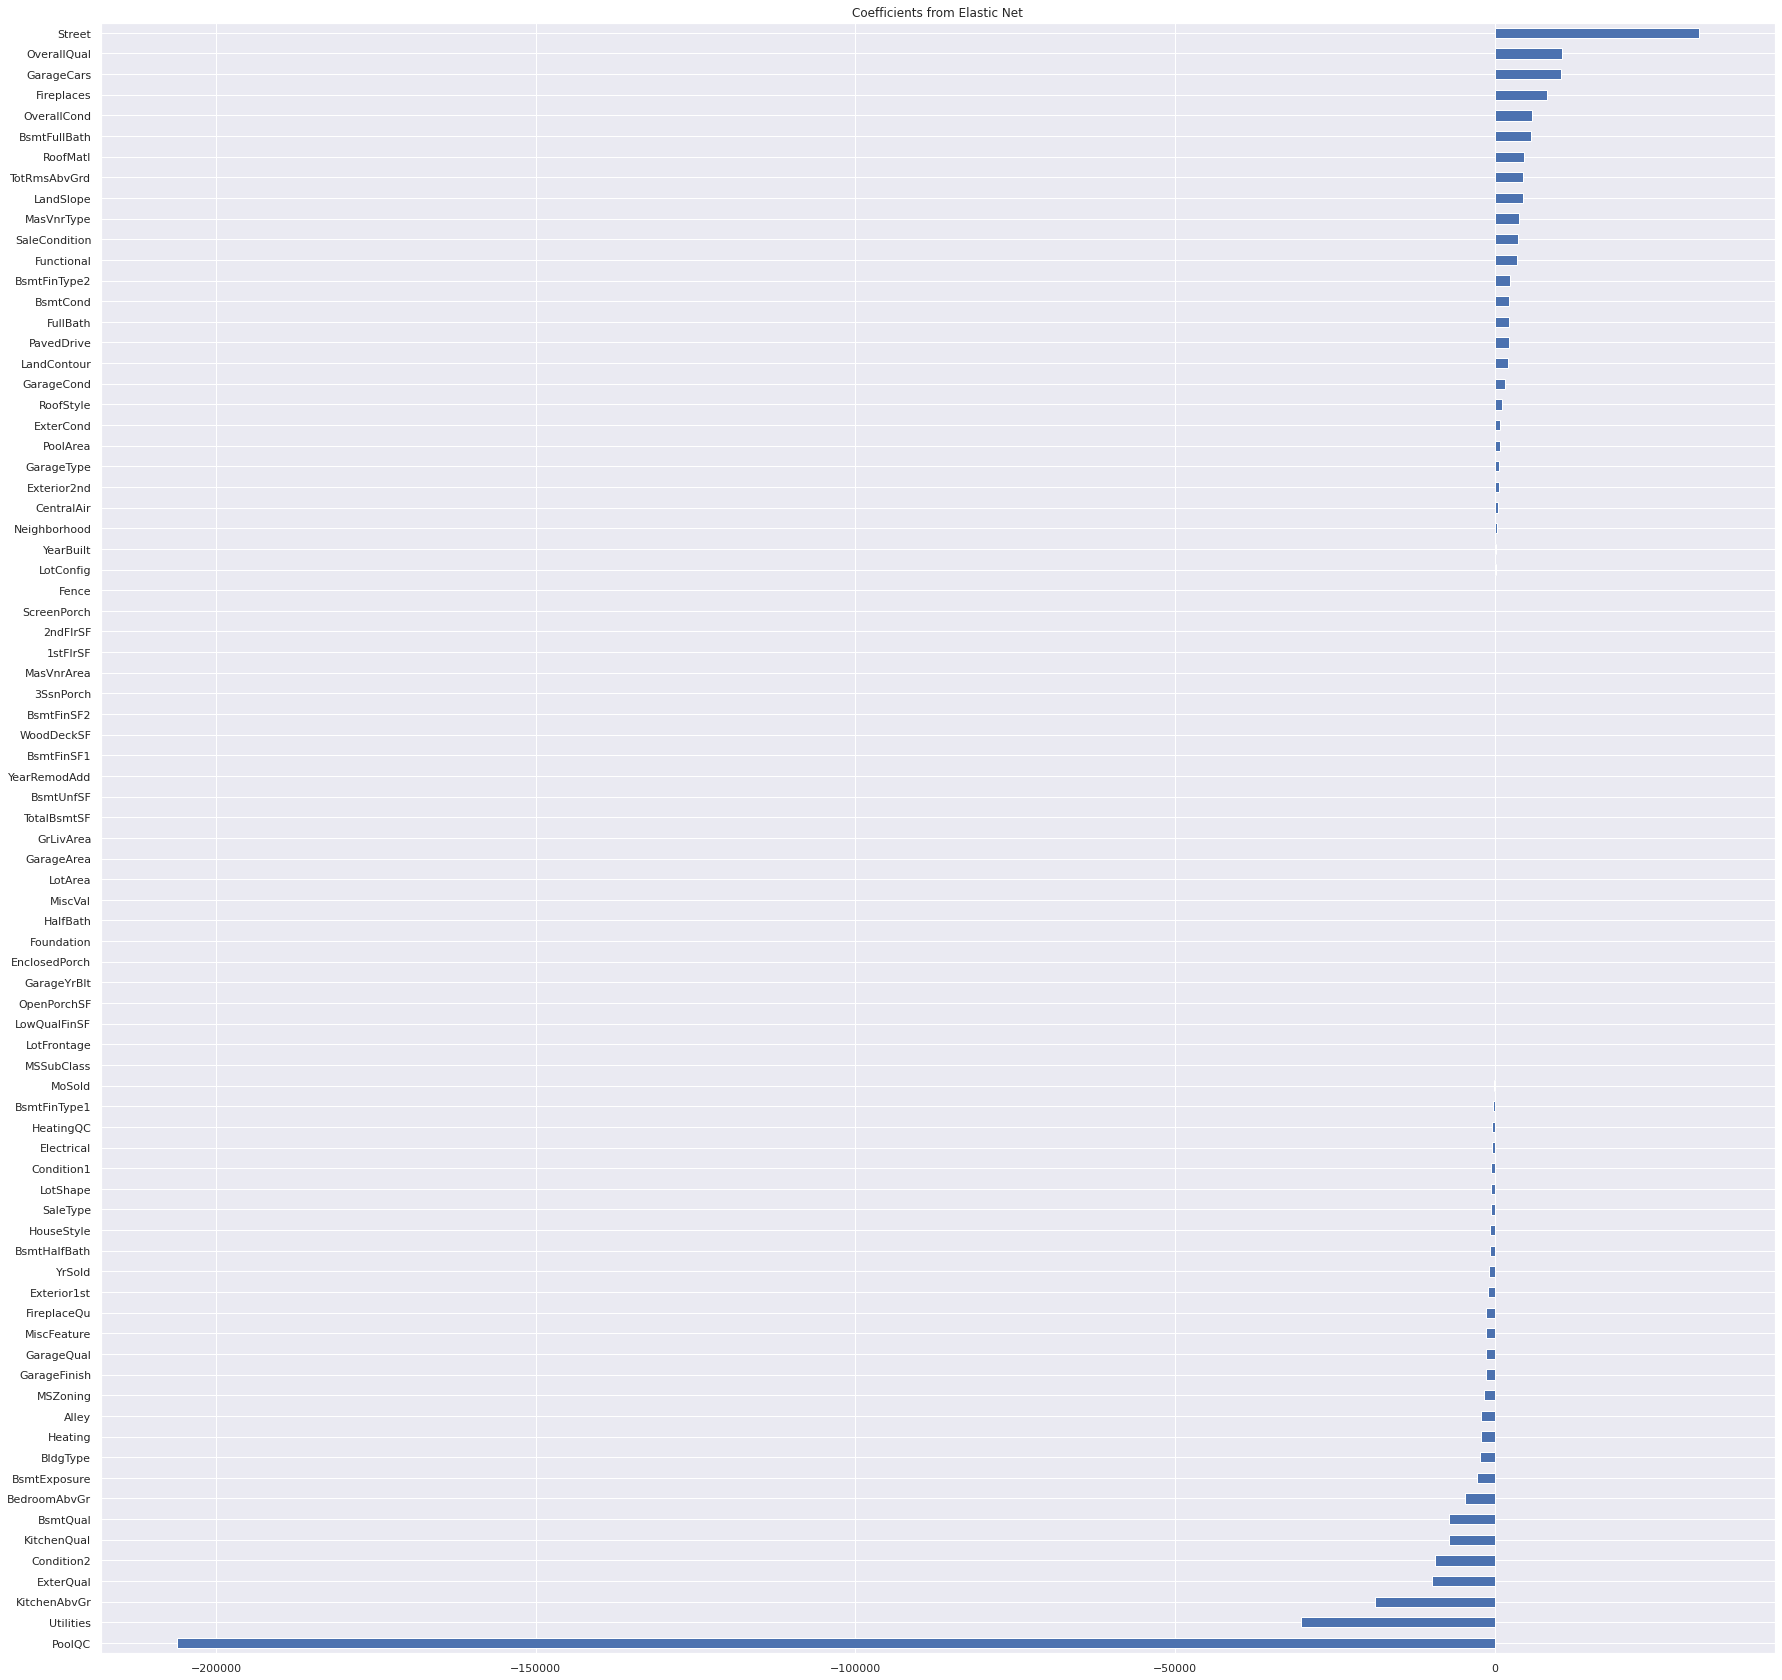

In [33]:
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


plt.figure(figsize=(30,30))
sb.set(style="ticks")
sb.set_style("darkgrid")

temp_x = train.drop(columns = 'SalePrice')
temp_y = train['SalePrice']

elastic = ElasticNet(alpha=10,l1_ratio = 1,max_iter=700)
elastic.fit(temp_x,temp_y)

coef = pd.Series(elastic.coef_,index=temp_x.columns)
coef.sort_values().plot(kind='barh')
plt.title("Coefficients from Elastic Net")


### Picking weak coeffecients corresponding to respective columns in order for them to be dropped 

In [34]:
weak_coeffs = {coef.index[x]:coef.values[x] for x in range(len(coef)) if abs(coef.values[x])<=10}
weak_coeffs

{'BsmtUnfSF': 9.980220480521997,
 'EnclosedPorch': -4.894163814607091,
 'Foundation': -0.0,
 'GarageArea': 4.7552428355764516,
 'GarageYrBlt': -7.659089547748374,
 'GrLivArea': 4.81018231803325,
 'HalfBath': -0.0,
 'LotArea': 0.38657109625293246,
 'MiscVal': 0.2823329374710532,
 'OpenPorchSF': -7.836890427045214,
 'TotalBsmtSF': 5.57733394323401}

In [36]:
num = X_train.nunique()
numerical_cols = {num.index[x]:num.values[x] for x in range(len(num)) if num.values[x]>100}
len(numerical_cols)

15

In [37]:
from sklearn.preprocessing import StandardScaler

col_names = numerical_cols

train_features = temp_x[list(col_names.keys())]
test_features = test[list(col_names.keys())]

scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)

scaler = StandardScaler().fit(test_features.values)
test_features = scaler.transform(test_features.values)

temp_x[list(col_names.keys())] = train_features

In [38]:
temp_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,0.212877,-0.207142,1,0,3,3,1,4,0,5,2,2,0,5,7,5,1.050994,2003,1,1,13,14,2,0.514104,2,4,2,3,4,4,3,0.575425,6,-0.288653,-0.944591,-0.459303,1,0,1,5,-0.793434,1.161852,0,0.370333,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,0.351000,5,5,2,-0.752176,0.216503,-0.359325,0,0,0,0,0,0,0,2,2008,9,4
1,20,4,0.645747,-0.091886,1,0,3,3,1,2,0,24,1,2,0,2,6,8,0.156734,1976,1,1,9,9,3,-0.570750,3,4,1,3,4,2,1,1.171992,6,-0.288653,-0.641228,0.466465,1,0,1,5,0.257140,-0.795163,0,-0.482512,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,-0.060731,5,5,2,1.626195,-0.704483,-0.359325,0,0,0,0,0,0,0,5,2007,9,4
2,60,4,0.299451,0.073480,1,0,0,3,1,4,0,5,2,2,0,5,7,5,0.984752,2002,1,1,13,14,2,0.325915,2,4,2,3,4,3,3,0.092907,6,-0.288653,-0.301643,-0.313369,1,0,1,5,-0.627826,1.189351,0,0.515013,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,0.631726,5,5,2,-0.752176,-0.070361,-0.359325,0,0,0,0,0,0,0,9,2008,9,4
3,70,4,0.068587,-0.096897,1,0,0,3,1,0,0,6,2,2,0,5,7,5,-1.863632,1970,1,1,14,16,3,-0.570750,3,4,0,4,2,4,1,-0.499274,6,-0.288653,-0.061670,-0.687324,1,2,1,5,-0.521734,0.937276,0,0.383659,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,0.790804,5,5,2,-0.752176,-0.176048,4.092524,0,0,0,0,0,0,0,2,2006,9,0
4,60,4,0.761179,0.375148,1,0,0,3,1,2,0,15,2,2,0,5,8,5,0.951632,2000,1,1,13,14,2,1.366489,2,4,2,3,4,1,3,0.463568,6,-0.288653,-0.174865,0.199680,1,0,1,5,-0.045611,1.617877,0,1.299326,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,1.698485,5,5,2,0.780197,0.563760,-0.359325,0,0,0,0,0,0,0,12,2008,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4,0.126303,-0.260560,1,0,3,3,1,4,0,8,2,2,0,5,6,5,0.918511,2000,1,1,13,14,3,-0.570750,3,4,2,3,4,4,6,-0.973018,6,-0.288653,0.873321,-0.238122,1,0,1,5,-0.542435,0.795198,0,0.250402,0,0,2,1,3,1,4,7,7,1,5,2,1999.0,2,2,-0.060731,5,5,2,-0.752176,-0.100558,-0.359325,0,0,0,0,0,0,0,8,2007,9,4
1456,20,4,0.790037,0.266407,1,0,3,3,1,4,0,14,2,2,0,2,6,6,0.222975,1988,1,1,10,11,4,0.087911,3,4,1,3,4,4,1,0.759659,5,0.722112,0.049262,1.104925,1,4,1,5,2.355701,-0.795163,0,1.061367,1,0,2,0,3,1,4,7,3,2,5,2,1978.0,3,2,0.126420,5,5,2,2.033231,-0.704483,-0.359325,0,0,0,0,3,0,0,2,2010,9,4
1457,70,4,0.241735,-0.147810,1,0,3,3,1,4,0,6,2,2,0,5,7,9,-1.002492,2006,1,1,6,6,3,-0.570750,0,2,4,4,2,4,3,-0.369871,6,-0.288653,0.701265,0.215641,1,0,1,5,0.065656,1.844744,0,1.569647,0,0,2,0,4,1,3,9,7,2,3,2,1941.0,2,1,-1.033914,5,5,2,-0.752176,0.201405,-0.359325,0,0,0,0,1,3,2500,5,2010,9,4
1458,20,4,0.299451,-0.080160,1,0,3,3,1,4,0,12,2,2,0,2,5,6,-0.704406,1996,3,1,9,9,3,-0.570750,3,4,1,4,4,3,3,-0.865548,5,6.092188,-1.284176,0.046905,1,2,1,1,-0.218982,-0.795163,0,-0.832788,1,0,1,0,2,1,3,5,7,0,0,2,1950.0,3,1,-1.090059,5,5,2,2.168910,-0.704483,1.473789,0,0,0,0,0,0,0,4,2010,9,4


In [39]:
from sklearn.model_selection import train_test_split

# temp_x.drop(columns=weak_coeffs, inplace=True)
X_train, X_validation, y_train, y_validation = train_test_split(temp_x, temp_y, test_size=0.2, random_state=123)

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_validation, y_validation)

0.8695292478498511

In [41]:
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

elastic = ElasticNet()
distributions = dict(alpha=uniform(loc=0, scale=3),l1_ratio = uniform(loc=0, scale=1))
clf = RandomizedSearchCV(elastic, distributions, n_iter=50, random_state=13)
search = clf.fit(X_train, y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.849e+09, tolerance: 5.936e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.156e+09, tolerance: 6.094e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 1.827127388283834, 'l1_ratio': 0.7755265146048467}

In [42]:

elastic = ElasticNet()
elastic = ElasticNet(**search.best_params_,max_iter=700)
elastic.fit(X_train,y_train)

elastic.score(X_validation, y_validation)

0.8606843243843151

In [69]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

train_size = 100

svr = GridSearchCV(
    SVR(kernel="rbf", gamma=1),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2000, 5)},
)


/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


In [70]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  F

GridSearchCV(estimator=SVR(gamma=1),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([0.01,  inf,  inf,  inf,  inf])})

In [71]:
svr.score(X_validation, y_validation)

0.16864808954208632

## Feature selection using Forwards selection of features

### Choosing each column and adding them to trainable columns if it betters the adj_rsquared score of the model and hash an optimal p-value

In [43]:
import statsmodels.api as sm

def get_stats(cols):
    x = temp_x[cols]
    y = temp_y
    results = sm.OLS(y, x).fit()
    return results

prev,cols = 0,[]

for i,c in enumerate(temp_x.columns):
    cols.append(c)
    results = get_stats(cols)
    if not results.pvalues[-1]<0.05 or not results.rsquared_adj-prev>0.0001:
        cols.pop()
    print(cols)
    print(c,results.pvalues[-1])
    print(results.rsquared_adj)
    print()
    prev = results.rsquared_adj

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['MSSubClass']
MSSubClass 8.515657747491447e-229
0.5104887502217594

['MSSubClass', 'MSZoning']
MSZoning 6.5224070559245745e-285
0.799377802252437

['MSSubClass', 'MSZoning', 'LotFrontage']
LotFrontage 4.573912270528693e-16
0.8081306142201484

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea']
LotArea 1.0232796241568185e-20
0.8191535335163814

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
Street 1.8023931931572787e-80
0.8587942838979459

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley']
Alley 0.00019482649702569016
0.8600401300660027

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape']
LotShape 1.213942545443737e-20
0.868066271117184

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour']
LandContour 0.00044136544841800096
0.869093820622698

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']
Utilities 0.0001492

In [44]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1348.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        14:58:35   Log-Likelihood:                         -17201.
No. Observations:                1460   AIC:                                  3.448e+04
Df Residuals:                    1420   BIC:                                  3.469e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [45]:
from sklearn.model_selection import train_test_split

train_adj = temp_x[cols] 
X_train, X_validation, y_train, y_validation = train_test_split(train_adj, temp_y, test_size=0.25, random_state=123)

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_validation, y_validation)

0.8507055834026349

In [47]:
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

elastic = ElasticNet()
distributions = dict(alpha=uniform(loc=0, scale=12),l1_ratio = uniform(loc=0, scale=1))
clf = RandomizedSearchCV(elastic, distributions, n_iter=500, random_state=123)
search = clf.fit(X_train, y_train)
search.best_params_


{'alpha': 1.4475439918838848, 'l1_ratio': 0.8263408005068332}

In [48]:
plt.figure(figsize=(15,10))

elastic = ElasticNet()
elastic = ElasticNet(**search.best_params_,max_iter=700)
elastic.fit(X_train,y_train)


ElasticNet(alpha=1.4475439918838848, l1_ratio=0.8263408005068332, max_iter=700)

<Figure size 1080x720 with 0 Axes>

In [49]:
elastic.score(X_validation, y_validation)

0.8486017964280186